In [119]:
import pandas as pd
df = pd.read_excel('US Superstore data.xls')


print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [120]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
8        Florida   89473.7080
11      Illinois   80166.1010
33          Ohio   78258.1360
20      Michigan   76269.6140
44      Virginia   70636.7200


/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_17467/2021631737.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales.head(10), x="State", y="Sales", palette="viridis")


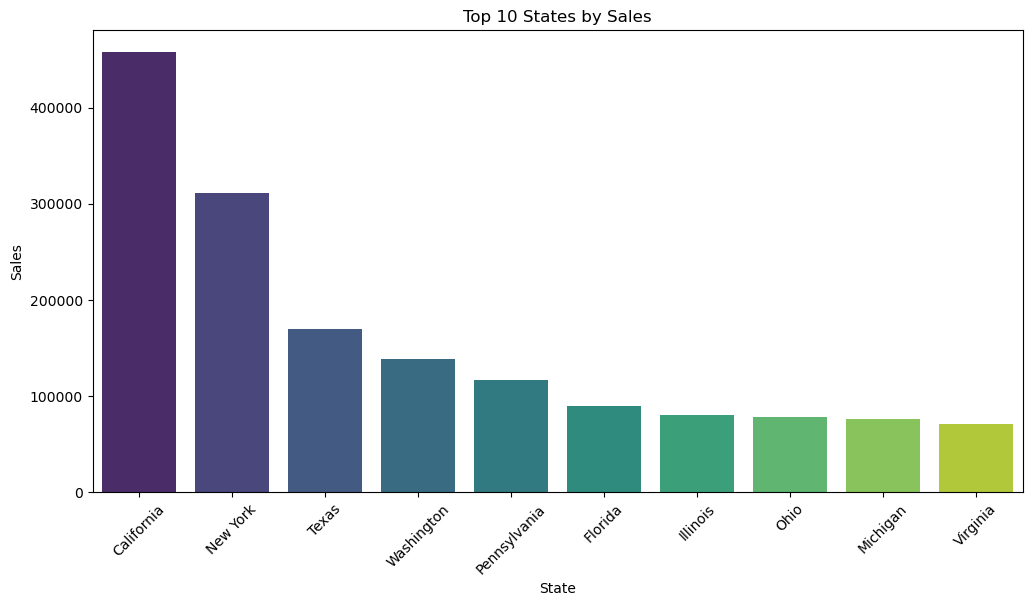

In [122]:
state_sales = df.groupby("State")["Sales"].sum().reset_index()

state_sales = state_sales.sort_values("Sales", ascending=False)

print(state_sales.head(10))

plt.figure(figsize=(12,6))
sns.barplot(data=state_sales.head(10), x="State", y="Sales", palette="viridis")
plt.title("Top 10 States by Sales")
plt.xticks(rotation=45)
plt.show()

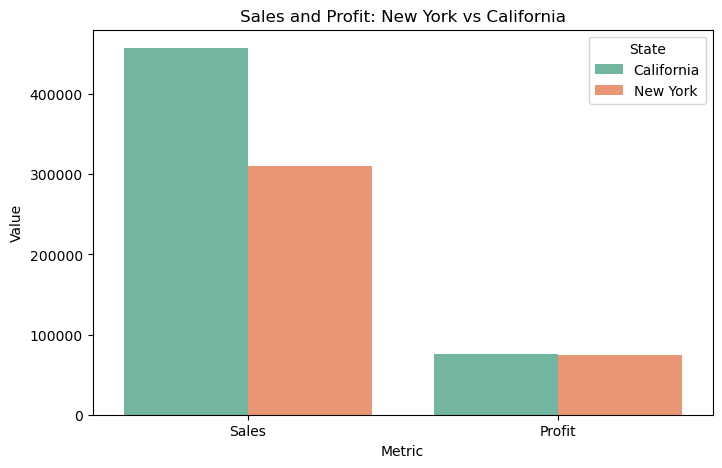

In [123]:
state_summary = df.groupby("State")[["Sales", "Profit"]].sum().reset_index()
comparison = state_summary[state_summary["State"].isin(["New York", "California"])]
plt.figure(figsize=(8,5))
comparison_melted = comparison.melt(id_vars="State", value_vars=["Sales","Profit"], var_name="Metric", value_name="Value")

sns.barplot(data=comparison_melted, x="Metric", y="Value", hue="State", palette="Set2")
plt.title("Sales and Profit: New York vs California")
plt.show()

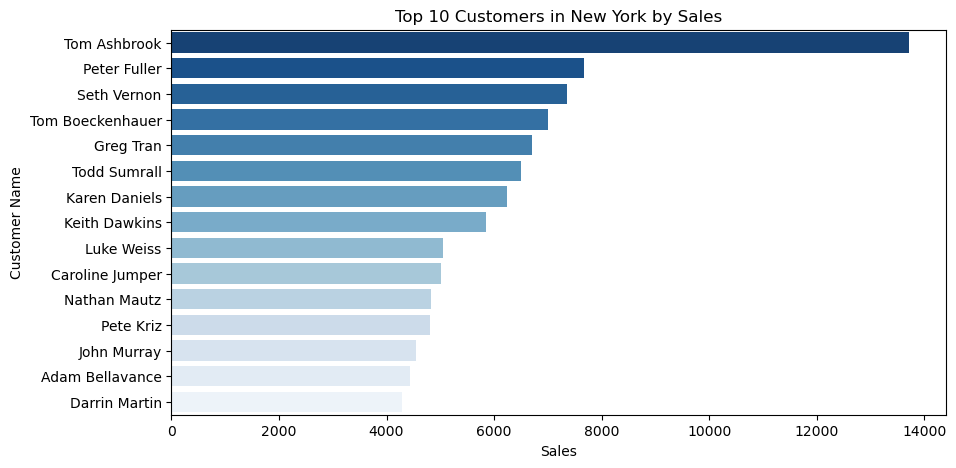

In [124]:
ny_customers = df[df["State"] == "New York"]

ny_summary = ny_customers.groupby("Customer Name")[["Sales", "Profit"]].sum().reset_index()

ny_summary = ny_summary.sort_values("Sales", ascending=False)

plt.figure(figsize=(10,5))
top_customers = ny_summary.head(15)
sns.barplot(data=top_customers, x="Sales", y="Customer Name", hue="Customer Name", palette="Blues_r", legend=False)
plt.title("Top 10 Customers in New York by Sales")
plt.show()

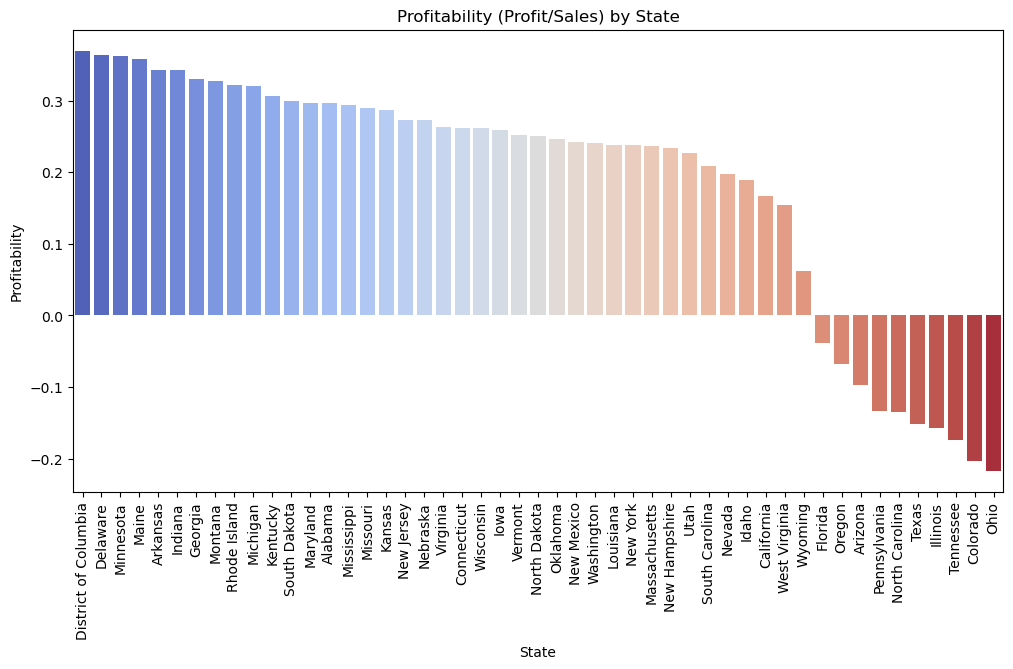

In [125]:
state_summary = df.groupby("State")[["Sales", "Profit"]].sum().reset_index()

# 2. Добавляем колонку profitability (рентабельность)
state_summary["Profitability"] = state_summary["Profit"] / state_summary["Sales"]

# 3. Сортируем для удобства
state_summary = state_summary.sort_values("Profitability", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=state_summary, x="State", y="Profitability", palette="coolwarm", hue="State")
plt.title("Profitability (Profit/Sales) by State")
plt.xticks(rotation=90)
plt.show()

19.17% of customers contribute 80% of profit


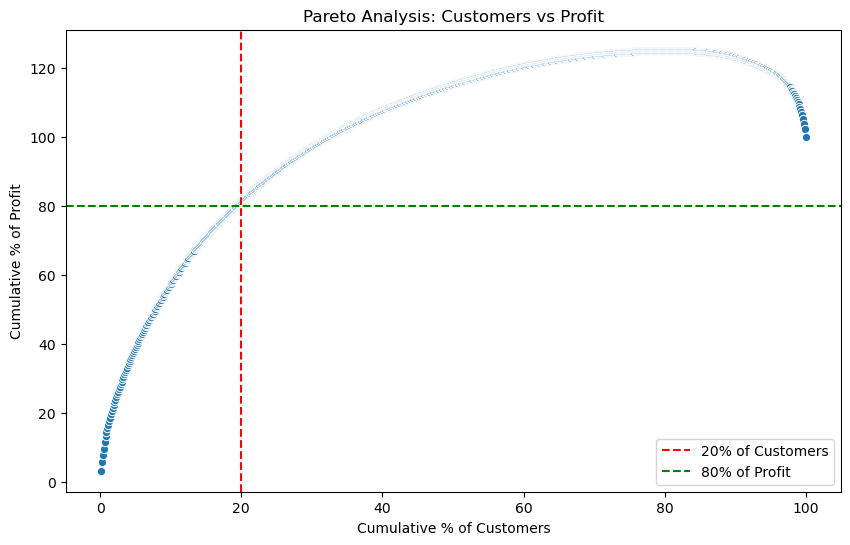

In [126]:
# 1. Aggregate profit by customer
customer_profit = df.groupby("Customer Name")["Profit"].sum().reset_index()

# 2. Sort customers by profit
customer_profit = customer_profit.sort_values("Profit", ascending=False).reset_index(drop=True)

# 3. Calculate cumulative profit and customer share
customer_profit["CumProfit"] = customer_profit["Profit"].cumsum()
total_profit = customer_profit["Profit"].sum()
customer_profit["CumProfitPct"] = customer_profit["CumProfit"] / total_profit * 100
customer_profit["CustomerPct"] = (customer_profit.index + 1) / len(customer_profit) * 100

# 4. Find cutoff for 80% of profit
pareto_cutoff = customer_profit[customer_profit["CumProfitPct"] <= 80]

print(f"{len(pareto_cutoff)/len(customer_profit)*100:.2f}% of customers contribute 80% of profit")

# 5. Plot Pareto curve
plt.figure(figsize=(10,6))
sns.lineplot(data=customer_profit, x="CustomerPct", y="CumProfitPct", marker="o")
plt.axvline(x=20, color="red", linestyle="--", label="20% of Customers")
plt.axhline(y=80, color="green", linestyle="--", label="80% of Profit")
plt.title("Pareto Analysis: Customers vs Profit")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative % of Profit")
plt.legend()
plt.show()


Top 20 Cities by Sales:
              City        Sales      Profit  Profitability
329  New York City  256368.1610  62036.9837       0.241984
266    Los Angeles  175851.3410  30440.7579       0.173105
452        Seattle  119540.7420  29156.0967       0.243901
438  San Francisco  112669.0920  17507.3854       0.155388
374   Philadelphia  109077.0130 -13837.7674      -0.126862
207        Houston   64504.7604 -10153.5485      -0.157408
80         Chicago   48539.5410  -6654.5688      -0.137096
437      San Diego   47521.0290   6377.1960       0.134197
216   Jacksonville   44713.1830  -2323.8350      -0.051972
464    Springfield   43054.3420   6200.6974       0.144020
123        Detroit   42446.9440  13181.7908       0.310547
94        Columbus   38706.2430   5897.1013       0.152355
330         Newark   28576.1190   5793.7588       0.202748
93        Columbia   25283.3240   5606.1167       0.221732
233      Lafayette   25036.2000  10018.3876       0.400156
215        Jackson   24963.8580 

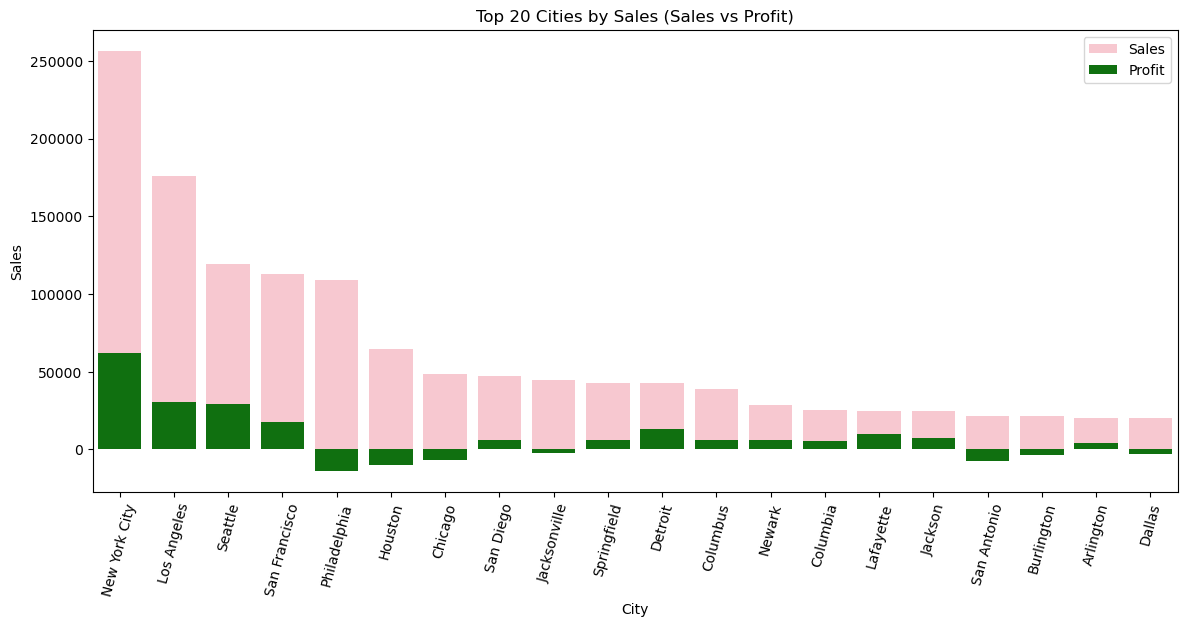

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_17467/4140148635.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20_sales, x="City", y="Profitability", palette="coolwarm")


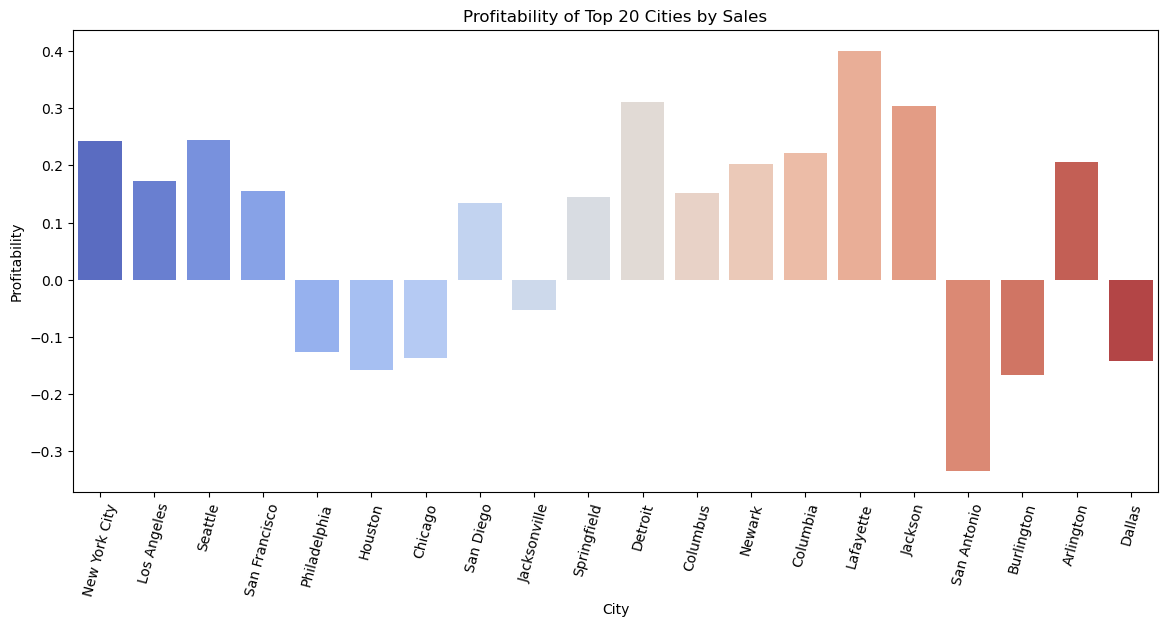

In [127]:
city_summary = df.groupby("City")[["Sales", "Profit"]].sum().reset_index()

city_summary["Profitability"] = city_summary["Profit"] / city_summary["Sales"]

top20_sales = city_summary.sort_values("Sales", ascending=False).head(20)

top20_profit = city_summary.sort_values("Profit", ascending=False).head(20)

print("Top 20 Cities by Sales:")
print(top20_sales)

print("\nTop 20 Cities by Profit:")
print(top20_profit)

plt.figure(figsize=(14,6))
sns.barplot(data=top20_sales, x="City", y="Sales", color="pink", label="Sales")
sns.barplot(data=top20_sales, x="City", y="Profit", color="green", label="Profit")
plt.xticks(rotation=75)
plt.title("Top 20 Cities by Sales (Sales vs Profit)")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(data=top20_sales, x="City", y="Profitability", palette="coolwarm")
plt.xticks(rotation=75)
plt.title("Profitability of Top 20 Cities by Sales")
plt.show()

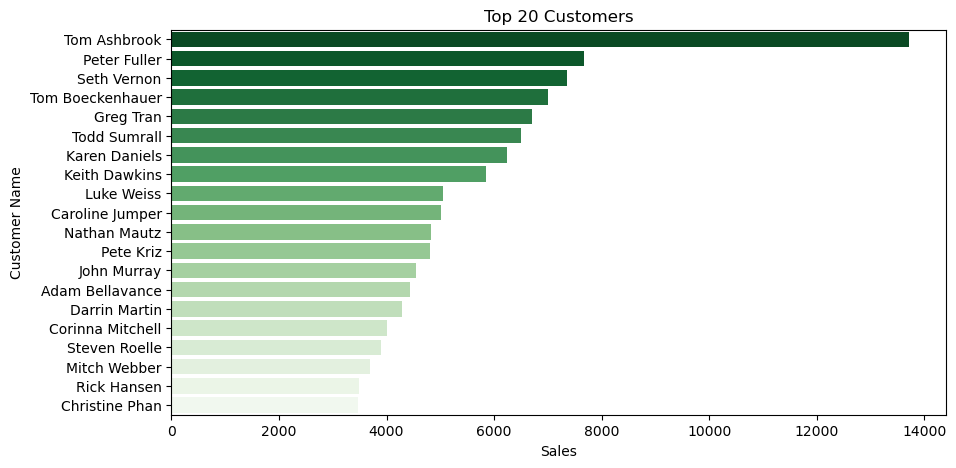

In [128]:
customer_sale = df[df["State"] == "New York"]

customer_sale = customer_sale.groupby("Customer Name")["Sales"].sum().reset_index()

customer_sale = customer_sale.sort_values("Sales", ascending=False)

plt.figure(figsize=(10,5))
top_customers = customer_sale.head(20)
sns.barplot(data=top_customers.head(20), x="Sales", y="Customer Name", hue="Customer Name", palette="Greens_r", legend=False)
plt.title("Top 20 Customers")
plt.show()

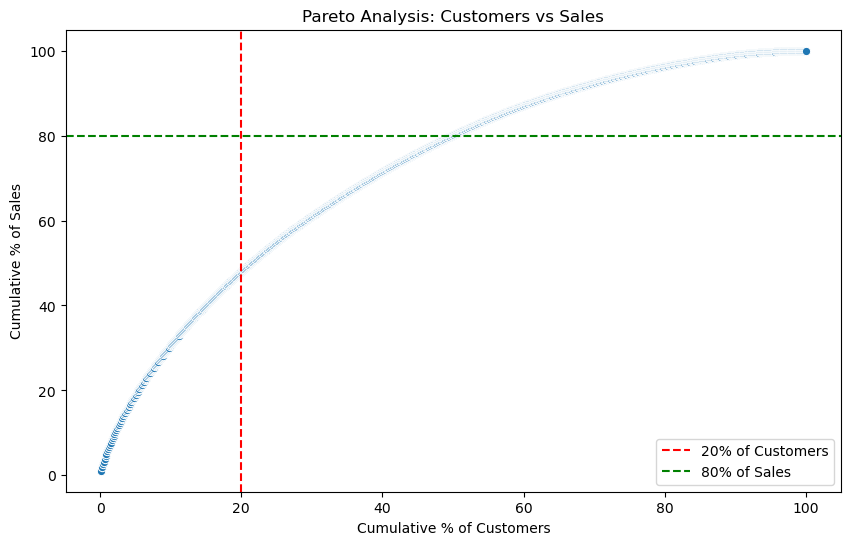

49.81% of customers contribute 80% of sales


In [129]:
# 1. Aggregate Sales by Customer
customer_sales = df.groupby("Customer Name")["Sales"].sum().reset_index()

# 2. Sort customers by Sales (descending)
customer_sales = customer_sales.sort_values("Sales", ascending=False).reset_index(drop=True)

# 3. Calculate cumulative Sales and percentage
customer_sales["CumSales"] = customer_sales["Sales"].cumsum()
total_sales = customer_sales["Sales"].sum()
customer_sales["CumSalesPct"] = customer_sales["CumSales"] / total_sales * 100
customer_sales["CustomerPct"] = (customer_sales.index + 1) / len(customer_sales) * 100

# 4. Plot cumulative curve (Pareto curve)
plt.figure(figsize=(10,6))
sns.lineplot(data=customer_sales, x="CustomerPct", y="CumSalesPct", marker="o")
plt.axvline(x=20, color="red", linestyle="--", label="20% of Customers")
plt.axhline(y=80, color="green", linestyle="--", label="80% of Sales")
plt.title("Pareto Analysis: Customers vs Sales")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative % of Sales")
plt.legend()
plt.show()

# 5. Check if Pareto principle holds
pareto_cutoff = customer_sales[customer_sales["CumSalesPct"] <= 80]
print(f"{len(pareto_cutoff)/len(customer_sales)*100:.2f}% of customers contribute 80% of sales")

Marketing Strategy — States

California & New York: Strong markets. Keep and grow marketing. Use retention, cross-sell, and bundles.

Washington: Good market. Run targeted growth campaigns. Check that margin stays positive.

Texas and Pennsylvania: Profitability is negative. Pause big campaigns. Fix pricing, discounts, shipping/returns, and product mix first.

Marketing Strategy — Cities

Prioritize (good sales and positive profit): New York City, Los Angeles, Seattle, San Francisco, San Diego, Detroit.

Fix before big spend (negative profitability): Philadelphia, Houston, Chicago, Jacksonville. Find reasons (heavy discounts, high costs, returns) and correct them.

Customer Focus

19.17% of customers give 80% of profit. We should focus on these customers with loyalty programs and special offers.